# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [301]:
pip install pandas

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder


## Load the Data

In [335]:
df= pd.read_csv("Traffic_Accidents.csv")

In [ ]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [ ]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [ ]:
# shape of data
df.shape

(52000, 26)

In [ ]:
# veiw the data head
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [ ]:
#view the data tail
df.tail()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51999,454710.0,185430.0,-1.212104,51.565050,43,3.0,3,1.0,24/05/2010,2,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2010


In [ ]:
# view random data
df.sample()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
31223,531140.0,175830.0,-0.113466,51.466198,1,3.0,1,1.0,28/04/2005,5,...,3,23,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,No,2005


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

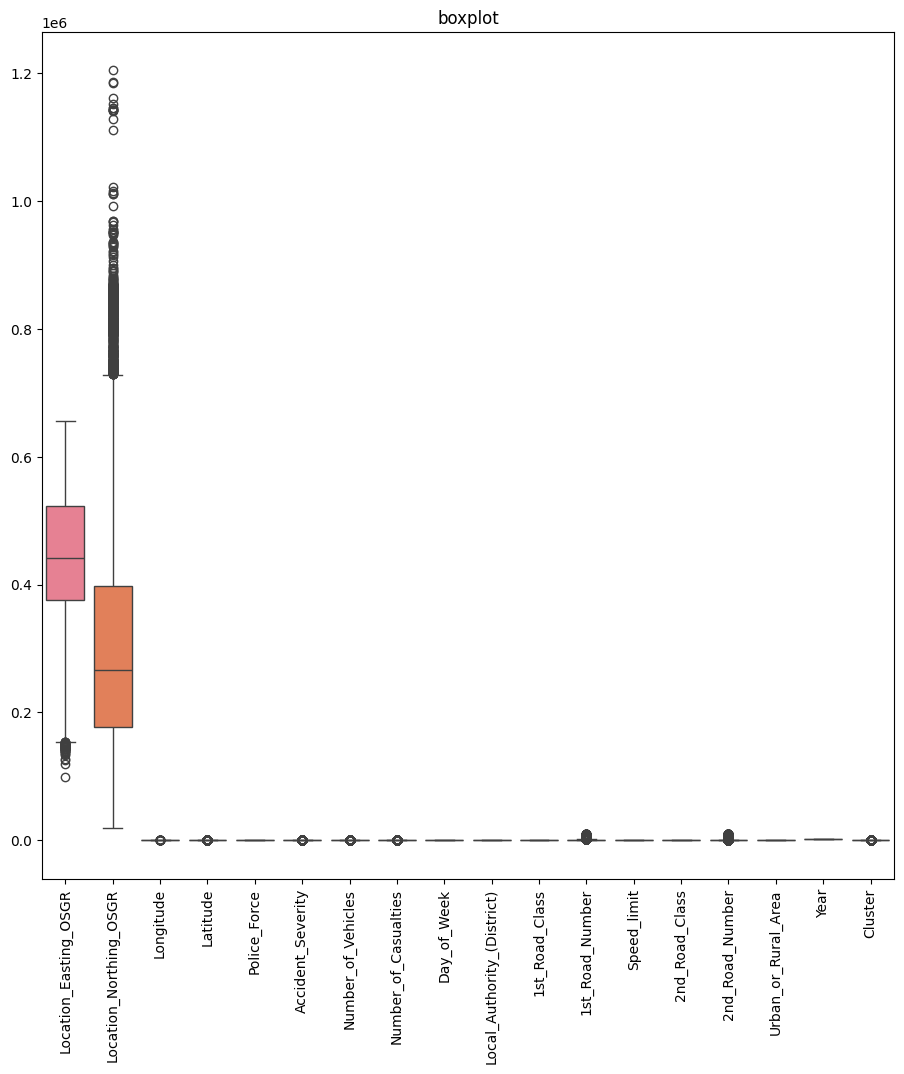

In [330]:
# detect outliers
# sns.boxplot(df['Location_Easting_OSGR'])

# all coulumns boxplot
plt.figure(figsize=(11, 11))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('boxplot')
plt.show()

In [ ]:
# remove outliers
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
# apply the function
df = remove_outliers(df, 'Location_Easting_OSGR')
df = remove_outliers(df, 'Location_Northing_OSGR')

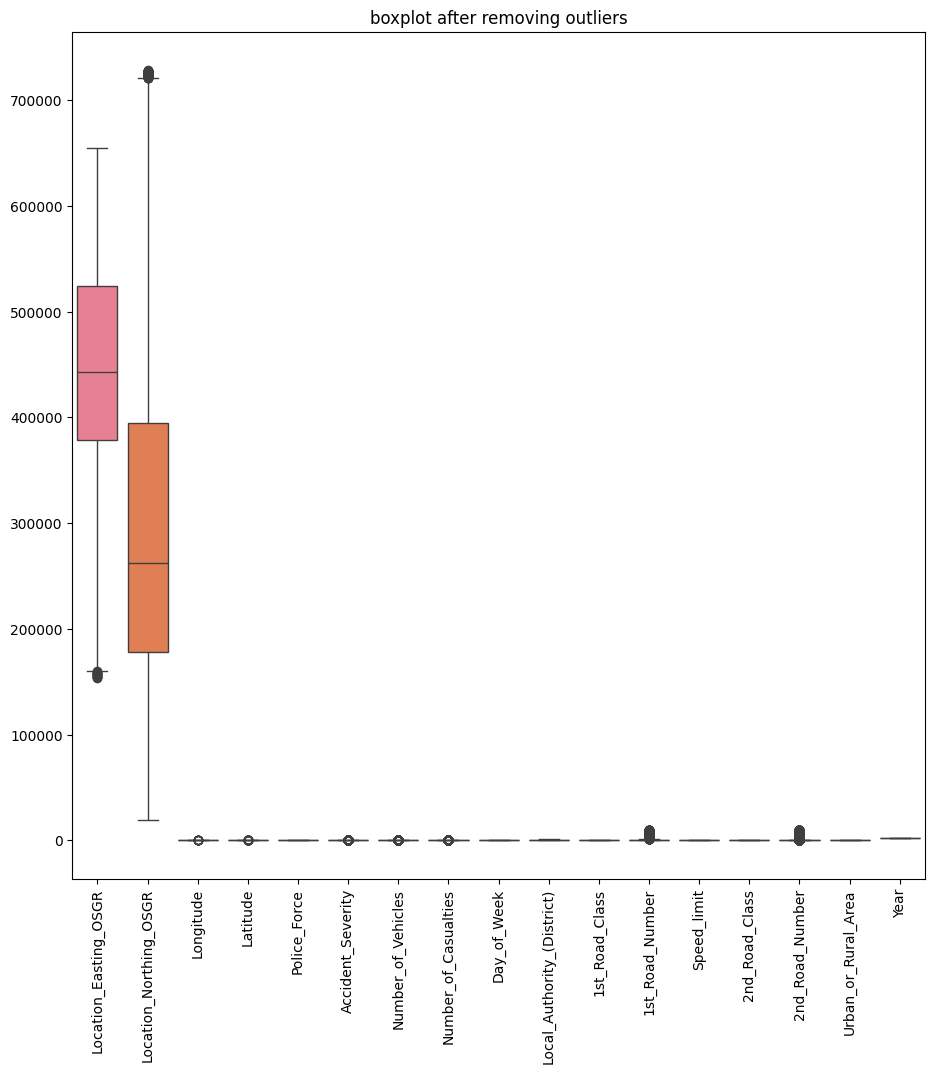

In [ ]:
# check the data after removing outliers 
plt.figure(figsize=(11, 11))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('boxplot after removing outliers')
plt.show()

In [ ]:
# missing values


In [ ]:
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.8818,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.20302,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51200,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51201,456682.0,127058.0,-1.192915,51.04003,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51202,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51203,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011


In [ ]:
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011


In [ ]:
df.isnull().sum()

Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                               318
Number_of_Vehicles                                0
Number_of_Casualties                           1025
Date                                              0
Day_of_Week                                       0
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
2nd_Road_Class                                    0
2nd_Road_Number                                   0
Pedestrian_Crossing-Human_Control                 0
Pedestrian_C

In [ ]:
# imputer the null values
imp = SimpleImputer(strategy="most_frequent")


In [ ]:
imp= imp.fit_transform(df)
df = pd.DataFrame(imp, columns=df.columns)

In [ ]:
df.isnull().sum()

Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions    

In [ ]:
# convert types
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Encode 
df = pd.get_dummies(df)

In [ ]:
# scall the data
std_scaler = StandardScaler()
 
df = std_scaler.fit_transform(df.to_numpy())
df = pd.DataFrame(df)


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,260
0,1.264296,-1.214122,1.219030,-1.220820,0.649758,0.404529,-1.146291,-0.414816,0.0,0.970455,...,-0.089257,-0.137726,-1.481714,26.312228,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
1,0.721024,-0.698383,0.712769,-0.697738,-1.150962,0.404529,0.227620,-0.414816,0.0,-1.625332,...,-0.089257,-0.137726,0.674894,-0.038005,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
2,-1.322950,-0.810182,-1.290387,-0.806603,1.236949,0.404529,0.227620,-0.414816,0.0,-0.067860,...,-0.089257,-0.137726,0.674894,-0.038005,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
3,-1.036542,0.672210,-1.040316,0.675575,-1.033524,0.404529,-1.146291,0.754485,0.0,1.489612,...,-0.089257,-0.137726,-1.481714,-0.038005,-0.147552,-0.041173,-0.086253,1.599143,-0.483626,0.483626
4,-0.565628,0.311280,-0.554861,0.317403,-0.368040,0.404529,0.227620,0.754485,0.0,-0.587017,...,-0.089257,-0.137726,0.674894,-0.038005,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,260
0,1.264296,-1.214122,1.219030,-1.220820,0.649758,0.404529,-1.146291,-0.414816,0.0,0.970455,...,-0.089257,-0.137726,-1.481714,26.312228,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
1,0.721024,-0.698383,0.712769,-0.697738,-1.150962,0.404529,0.227620,-0.414816,0.0,-1.625332,...,-0.089257,-0.137726,0.674894,-0.038005,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
2,-1.322950,-0.810182,-1.290387,-0.806603,1.236949,0.404529,0.227620,-0.414816,0.0,-0.067860,...,-0.089257,-0.137726,0.674894,-0.038005,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
3,-1.036542,0.672210,-1.040316,0.675575,-1.033524,0.404529,-1.146291,0.754485,0.0,1.489612,...,-0.089257,-0.137726,-1.481714,-0.038005,-0.147552,-0.041173,-0.086253,1.599143,-0.483626,0.483626
4,-0.565628,0.311280,-0.554861,0.317403,-0.368040,0.404529,0.227620,0.754485,0.0,-0.587017,...,-0.089257,-0.137726,0.674894,-0.038005,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,0.366325,0.120961,0.385619,0.123943,0.101713,0.404529,0.227620,-0.414816,0.0,0.970455,...,-0.089257,-0.137726,0.674894,-0.038005,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
51996,0.172410,-1.070915,0.167553,-1.064429,0.532320,0.404529,-1.146291,-0.414816,0.0,-0.067860,...,-0.089257,-0.137726,0.674894,-0.038005,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
51997,1.053801,-0.914792,1.029315,-0.918511,0.571466,0.404529,1.601532,-0.414816,0.0,-0.587017,...,-0.089257,-0.137726,-1.481714,-0.038005,-0.147552,-0.041173,-0.086253,1.599143,-0.483626,0.483626
51998,-0.058504,0.211565,-0.041532,0.217213,-0.015725,0.404529,0.227620,0.754485,0.0,0.970455,...,-0.089257,-0.137726,-1.481714,-0.038005,-0.147552,-0.041173,-0.086253,1.599143,-0.483626,0.483626


In [ ]:
# to dataframe 
df = pd.DataFrame(df, columns=df.columns)

In [ ]:
# after scalling
df

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,260
0,1.264296,-1.214122,1.219030,-1.220820,0.649758,0.404529,-1.146291,-0.414816,0.0,0.970455,...,-0.089257,-0.137726,-1.481714,26.312228,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
1,0.721024,-0.698383,0.712769,-0.697738,-1.150962,0.404529,0.227620,-0.414816,0.0,-1.625332,...,-0.089257,-0.137726,0.674894,-0.038005,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
2,-1.322950,-0.810182,-1.290387,-0.806603,1.236949,0.404529,0.227620,-0.414816,0.0,-0.067860,...,-0.089257,-0.137726,0.674894,-0.038005,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
3,-1.036542,0.672210,-1.040316,0.675575,-1.033524,0.404529,-1.146291,0.754485,0.0,1.489612,...,-0.089257,-0.137726,-1.481714,-0.038005,-0.147552,-0.041173,-0.086253,1.599143,-0.483626,0.483626
4,-0.565628,0.311280,-0.554861,0.317403,-0.368040,0.404529,0.227620,0.754485,0.0,-0.587017,...,-0.089257,-0.137726,0.674894,-0.038005,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,0.366325,0.120961,0.385619,0.123943,0.101713,0.404529,0.227620,-0.414816,0.0,0.970455,...,-0.089257,-0.137726,0.674894,-0.038005,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
51996,0.172410,-1.070915,0.167553,-1.064429,0.532320,0.404529,-1.146291,-0.414816,0.0,-0.067860,...,-0.089257,-0.137726,0.674894,-0.038005,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
51997,1.053801,-0.914792,1.029315,-0.918511,0.571466,0.404529,1.601532,-0.414816,0.0,-0.587017,...,-0.089257,-0.137726,-1.481714,-0.038005,-0.147552,-0.041173,-0.086253,1.599143,-0.483626,0.483626
51998,-0.058504,0.211565,-0.041532,0.217213,-0.015725,0.404529,0.227620,0.754485,0.0,0.970455,...,-0.089257,-0.137726,-1.481714,-0.038005,-0.147552,-0.041173,-0.086253,1.599143,-0.483626,0.483626


In [ ]:
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df)

In [ ]:
# apply pca 
pca = PCA(n_components=2)
pca = pca.fit_transform(df_imputed)

In [ ]:
df = pd.DataFrame(df_imputed, columns=df.columns)
df

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,260
0,1.264296,-1.214122,1.219030,-1.220820,0.649758,0.404529,-1.146291,-0.414816,0.0,0.970455,...,-0.089257,-0.137726,-1.481714,26.312228,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
1,0.721024,-0.698383,0.712769,-0.697738,-1.150962,0.404529,0.227620,-0.414816,0.0,-1.625332,...,-0.089257,-0.137726,0.674894,-0.038005,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
2,-1.322950,-0.810182,-1.290387,-0.806603,1.236949,0.404529,0.227620,-0.414816,0.0,-0.067860,...,-0.089257,-0.137726,0.674894,-0.038005,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
3,-1.036542,0.672210,-1.040316,0.675575,-1.033524,0.404529,-1.146291,0.754485,0.0,1.489612,...,-0.089257,-0.137726,-1.481714,-0.038005,-0.147552,-0.041173,-0.086253,1.599143,-0.483626,0.483626
4,-0.565628,0.311280,-0.554861,0.317403,-0.368040,0.404529,0.227620,0.754485,0.0,-0.587017,...,-0.089257,-0.137726,0.674894,-0.038005,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,0.366325,0.120961,0.385619,0.123943,0.101713,0.404529,0.227620,-0.414816,0.0,0.970455,...,-0.089257,-0.137726,0.674894,-0.038005,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
51996,0.172410,-1.070915,0.167553,-1.064429,0.532320,0.404529,-1.146291,-0.414816,0.0,-0.067860,...,-0.089257,-0.137726,0.674894,-0.038005,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
51997,1.053801,-0.914792,1.029315,-0.918511,0.571466,0.404529,1.601532,-0.414816,0.0,-0.587017,...,-0.089257,-0.137726,-1.481714,-0.038005,-0.147552,-0.041173,-0.086253,1.599143,-0.483626,0.483626
51998,-0.058504,0.211565,-0.041532,0.217213,-0.015725,0.404529,0.227620,0.754485,0.0,0.970455,...,-0.089257,-0.137726,-1.481714,-0.038005,-0.147552,-0.041173,-0.086253,1.599143,-0.483626,0.483626


In [ ]:
df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
256    0
257    0
258    0
259    0
260    0
Length: 261, dtype: int64

In [ ]:
correlation_matrix = df_scaled.corr()

In [ ]:
# one hot incoded
df_encoded = pd.get_dummies(df, columns=['Feature2'])
df

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,260
0,1.264296,-1.214122,1.219030,-1.220820,0.649758,0.404529,-1.146291,-0.414816,0.0,0.970455,...,-0.089257,-0.137726,-1.481714,26.312228,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
1,0.721024,-0.698383,0.712769,-0.697738,-1.150962,0.404529,0.227620,-0.414816,0.0,-1.625332,...,-0.089257,-0.137726,0.674894,-0.038005,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
2,-1.322950,-0.810182,-1.290387,-0.806603,1.236949,0.404529,0.227620,-0.414816,0.0,-0.067860,...,-0.089257,-0.137726,0.674894,-0.038005,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
3,-1.036542,0.672210,-1.040316,0.675575,-1.033524,0.404529,-1.146291,0.754485,0.0,1.489612,...,-0.089257,-0.137726,-1.481714,-0.038005,-0.147552,-0.041173,-0.086253,1.599143,-0.483626,0.483626
4,-0.565628,0.311280,-0.554861,0.317403,-0.368040,0.404529,0.227620,0.754485,0.0,-0.587017,...,-0.089257,-0.137726,0.674894,-0.038005,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,0.366325,0.120961,0.385619,0.123943,0.101713,0.404529,0.227620,-0.414816,0.0,0.970455,...,-0.089257,-0.137726,0.674894,-0.038005,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
51996,0.172410,-1.070915,0.167553,-1.064429,0.532320,0.404529,-1.146291,-0.414816,0.0,-0.067860,...,-0.089257,-0.137726,0.674894,-0.038005,-0.147552,-0.041173,-0.086253,-0.625335,-0.483626,0.483626
51997,1.053801,-0.914792,1.029315,-0.918511,0.571466,0.404529,1.601532,-0.414816,0.0,-0.587017,...,-0.089257,-0.137726,-1.481714,-0.038005,-0.147552,-0.041173,-0.086253,1.599143,-0.483626,0.483626
51998,-0.058504,0.211565,-0.041532,0.217213,-0.015725,0.404529,0.227620,0.754485,0.0,0.970455,...,-0.089257,-0.137726,-1.481714,-0.038005,-0.147552,-0.041173,-0.086253,1.599143,-0.483626,0.483626


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


becase these values is is contained the location of the acedants and the numbers of speed and cars, the road servise is also important to detect the reson of the acidants.

In [336]:
features = ['Longitude', 'Latitude', 'Number_of_Vehicles', 'Number_of_Casualties',
             'Road_Surface_Conditions', 'Speed_limit']

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

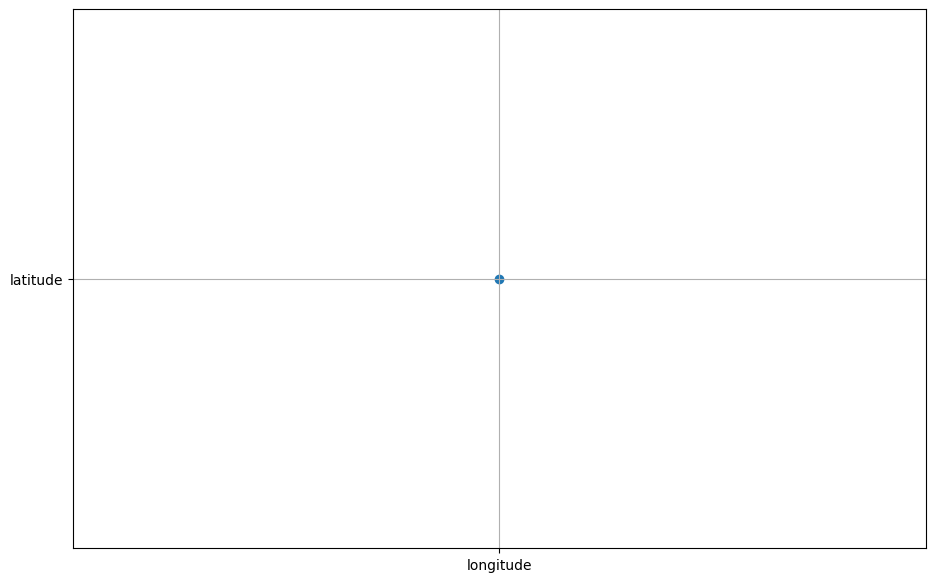

In [337]:
plt.figure(figsize=(11, 7))
plt.scatter(['longitude'], ['latitude'])
plt.grid(True)
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [430]:
preprocessor = ColumnTransformer(
    
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), ['Longitude', 'Latitude', 'Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit']),
        
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), [ 'Road_Surface_Conditions'])
    ])

In [431]:
X= preprocessor.fit_transform(df[features])

In [432]:
# using WCSS 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

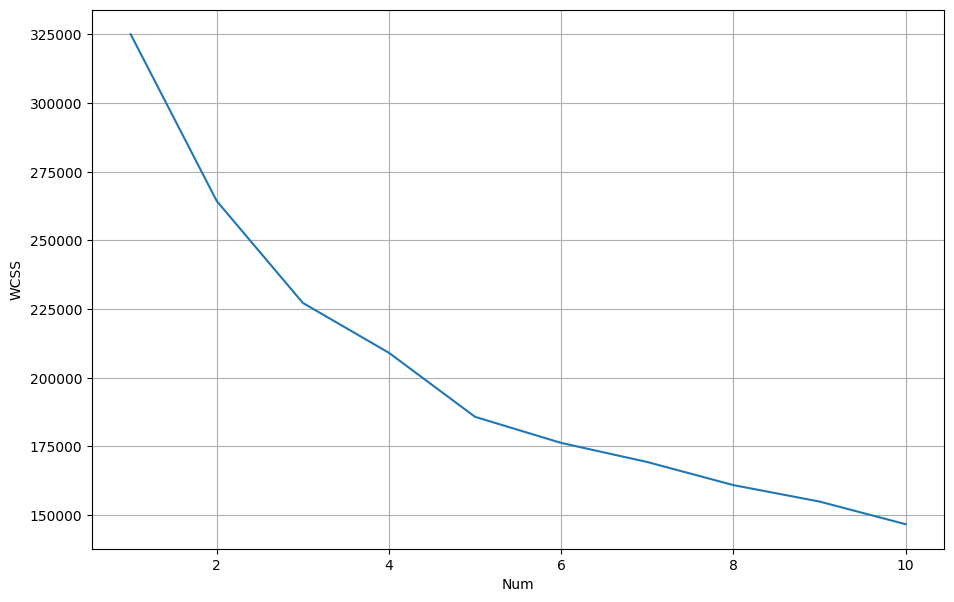

In [347]:
plt.figure(figsize=(11, 7))
plt.plot(range(1, 11), wcss)
plt.xlabel('Num')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [352]:
optimal_clusters = 5

In [353]:
# train the modul
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)

In [354]:
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [433]:
df['Cluster'] = kmeans.labels_

In [434]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,Cluster
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009,0
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010,5
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005,7
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007,2
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013,9


## Evaluation
Evaluate the clustering result using appropriate metrics.


In [437]:
label = df['Cluster']

In [440]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')


Silhouette Score: 0.23


## Plot the data points with their predicted cluster center

In [441]:

df=df

def euclidean_distance(p1, p2):

    p1 = np.array(p1, dtype=float)
    p2 = np.array(p2, dtype=float)
    return np.sqrt(np.sum((p1 - p2) ** 2))

def find_closest_cluster(point, clusters):
    
    closest_cluster = None
    min_distance = float('inf')
    
    for cluster_id, centroid in clusters.items():
        centroid = np.array(centroid, dtype=float)
        distance = euclidean_distance(point, centroid)
        if distance < min_distance:
            min_distance = distance
            closest_cluster = cluster_id
            
    return closest_cluster

def pred_cluster(X_df, clusters):
    
    X = X_df.to_numpy(dtype=float)  # Convert DataFrame to NumPy array
    return [find_closest_cluster(x, clusters) for x in X]

# Predict the closest cluster for each point in X_df
predictions = pred_cluster(X_df, clusters)

# Convert to NumPy arrays for plotting
X_np = X_df.to_numpy(dtype=float)
centroids = np.array(list(clusters.values()))


plt.figure(figsize=(8, 6))



<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

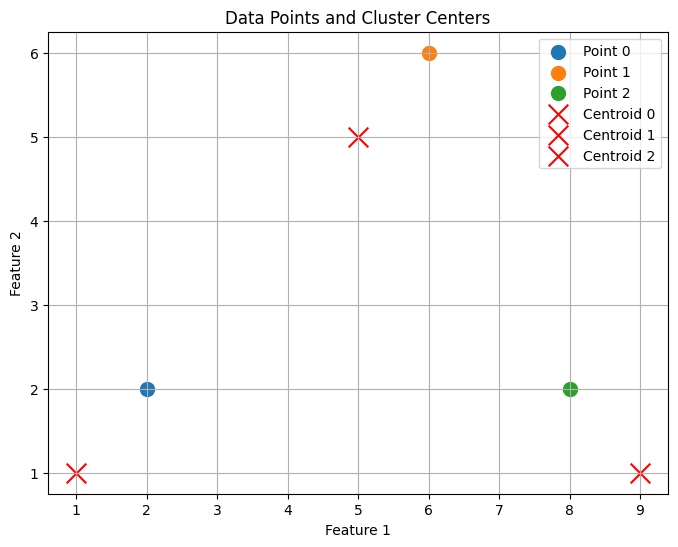

In [442]:

plt.figure(figsize=(8, 6))


for i, point in enumerate(X_np):
    plt.scatter(point[0], point[1], label=f'Point {i}', s=100)


for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], marker='x', color='red', s=200, label=f'Centroid {i}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points and Cluster Centers')
plt.legend()
plt.grid(True)

plt.show()

In [404]:

k = 5

In [405]:
clusters = {i: {'center': np.random.rand(X.shape[1])} for i in range(k)}

In [406]:

X = df

In [443]:
print(clusters.keys())


dict_keys([0, 1, 2])


In [444]:
# Predict the closest cluster for each point in Xpredictions = pred_cluster(X, clusters)
print(predictions)  

[0, 1, 2]


In [402]:

print(pred)

[4, 0, 1, 2, 1, 1, 3, 4, 2, 0, 4, 1, 3, 0, 2, 3, 3, 0, 1, 3, 3, 0, 1, 1, 4, 4, 4, 4, 4, 3, 0, 3, 2, 2, 0, 4, 4, 4, 3, 4, 4, 2, 4, 2, 0, 3, 4, 2, 0, 3, 4, 4, 2, 0, 2, 0, 0, 3, 3, 2, 3, 3, 0, 3, 4, 3, 3, 3, 3, 2, 3, 0, 3, 4, 4, 0, 2, 1, 3, 0, 4, 2, 4, 4, 4, 3, 3, 4, 4, 4, 4, 2, 1, 2, 3, 0, 4, 2, 0, 4]


## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?